In this notebook we select four galaxies with different redshifts and plot their $f_\lambda$ as measured from PAU narrow bands.

WAVELENGTH UNITS IN NM

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import bz2file
import pandas as pd

Loading sample:

In [2]:
with bz2file.BZ2File('/home/pablo/observational_data/PAU/PAU_photo-z.csv.bz2') as galaxy_fd:
    sample = pd.read_csv(galaxy_fd, sep=',', index_col = 'ref_id', comment='#', na_values = r'\N')

/home/pablo/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:472: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


The query used to retrieve this sample from cosmohub is:

Defining redshifts from which we will select galaxies:

In [4]:
z_grid=np.array([0.3, 0.6, 0.9, 1.2])

Selecting all unique galaxy indices in the sample:

In [5]:
g_id=np.unique(sample.index)

For each redshift in z_grid, we choose the first galaxy in the catalog with that redshift

In [28]:
select_id=np.zeros(z_grid.shape[0], dtype=int)
for i in range(z_grid.shape[0]):
    for j in range(g_id.shape[0]):
        if np.prod(sample.zb[g_id[j]]==z_grid[i]):
            select_id[i]=g_id[j]
            break
            
print('Selected galaxies:', select_id)

Selected galaxies: [1790 4783 1971 2670]


Defining light speed (nm/s) and the function to convert from PAU fluxes to $f_\lambda$ in rest frame

In [25]:
c=299792458e9

def PAU_to_cgs(flux, wl):
    # Converting to cgs flux density in frequency (erg/s/cm^2/Hz)
    flux=10**(-(26+48.6)/2.5)*flux
    #Converting to cgs flux (erg/s/cm^2/nm)
    flux=flux*c/wl**2 # Wavelength assumed in nm
    return flux

For each selected galaxy, extracting PAU fluxes and filter wavelengths in rest frame

In [32]:
flux=list()
wl=list()

for i in range(select_id.shape[0]):
    flux_tmp=np.copy(sample.flux[select_id[i]].values)
    wl_tmp=np.copy(sample.band[select_id[i]].values)
    for j in range(wl_tmp.shape[0]):
        wl_tmp[j]=int(wl_tmp[j][2:])
    ascending_ind=np.argsort(wl_tmp) #sorted in ascending order for plotting purposes
    flux.append(flux_tmp[ascending_ind])
    wl.append(wl_tmp[ascending_ind]/(1+z_grid[i])) # wavelengths converted to restframe

Converting to cgs flux densities in rest frame, plotting and saving

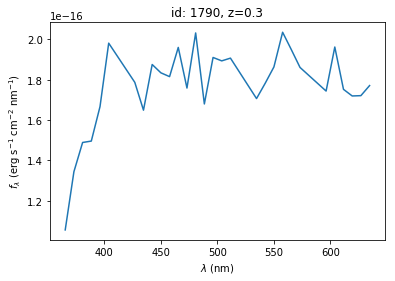

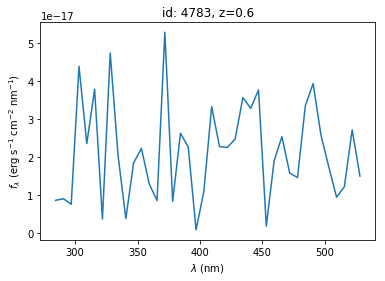

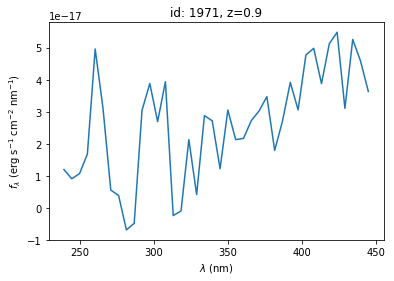

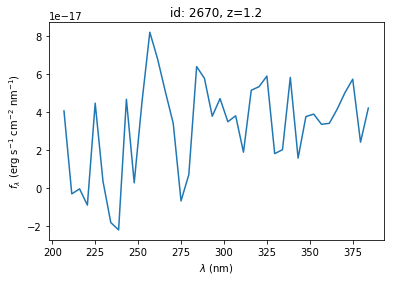

In [37]:
for i in range(len(flux)):
    plt.plot(wl[i], PAU_to_cgs(flux[i], wl[i]))
    plt.title('id: '+str(select_id[i])+', z='+str(z_grid[i]))
    plt.xlabel('$\lambda$ (nm)')
    plt.ylabel('$f_\lambda$ (erg s$^{-1}$ cm$^{-2}$ nm$^{-1}$)')
    plt.savefig(str(select_id[i])+'_nb.pdf', bbox_inches='tight')
    plt.savefig()
    plt.show()